Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

If a variable is given to you, give your answer to that variable. In case of multiple choice questions, answer to the given variable. Make sure your variable has a **string value** and it contains only the letter of your choice. For example if you think that choice b is the correct choice, and the given variable is answer, your answer should look like this:

answer = 'b'

or 

answer = 'B'

If you need to read a file for a task, datafiles, such as .csv or .txt files are found in data subfolder. This can be accessed using data/filename.extension. In case of image, they are found in subfolder images. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Houssem Menhour"

---

# Multimodal Data Fusion - Exercise 4 - Bayesian Inference and Parameter Estimation


In this exercise, we will take a closer look at the Bayesian framework and the basics of Bayesian inference to be needed in data fusion systems. You will be learning about prior likelihood, posterior, probabilistic models, and Bayes rule as well as applying these to parameter estimation with linear regression w/o outliers.

## Learning goals 

After completion of this exercise, you should be able to

- Understand the basic elements of Bayesian inference
- Be able to apply traditional and Bayesian methods in simple parameter estimation tasks (i.e. curve fitting)
- Apply outlier robust methods to simple parameter estimation problems
- Apply Gaussian mixure model for clustering problems
  

## Relevant lecture
Lecture 5.

## Relevant Sections in course book

Chapter 9-11

## Additional Material
* Visualization and plotting with [matplotlib](https://matplotlib.org)
* Scikit-learn page on [Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)
    * Linear Regression model [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
    * Bayesian Ridge model [BayesianRidge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge)
    * RANSAC (RANdom SAmple Consensus) algorithm [RANSACRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor)
* Scikit-learn page on [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
* Scikit-learn page on [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)


# Bayesian Inference - Parameter estimation: curve fitting

<a id='KmeansDemo'></a>
<div class=" alert alert-info">
    <b>Tutorial.</b> Generate sinusoidal data with noise and bias

The code below defines a function for generating sinusoidal data with noise and generate random data points for x-axis and y-axis. Complete and run the code below to visualize the data.
<p>1) Define our sinusoidal function </p>
<p>2) Generate "size" number of uniform random data points in the range of 0. and 1. for x-axis </p>
<p>3) Generate "size" number of random data points from standard normal distribution for y-axis </p>
<p>4) Make a deep copy and add outlier bias to 5 samples </p>
<p>5) Define linearly spaced vector with 100 points in the range of 0. to 1. </p>
<p>6) Plot data point without and with outliers (vectors "x" and "y/y2") </p>


**Hint: Your output image should look like in the cell below**

</div>

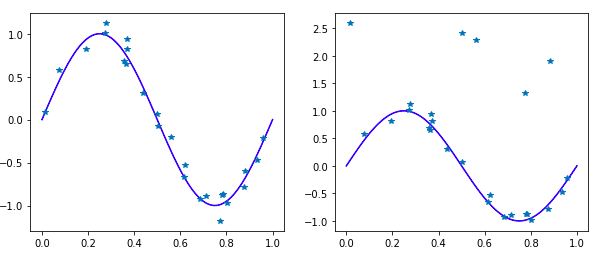

In [2]:
# Example image required for the above problem 
from IPython.display import Image
Image(filename='images/Fig1.png')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

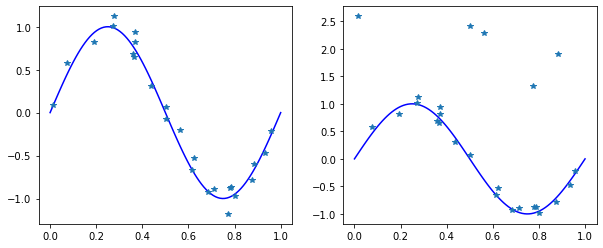

In [4]:
def func(x): return np.sin(2*np.pi*x)

size = 25

rng = np.random.RandomState(1234)
x = rng.uniform(0., 1., size)

y = rng.normal(scale=0.1, size=size)
y = func(x) + y

bias = 2.5
y2 = y.copy()
y2[15:20] = y2[15:20] + bias

xt = np.linspace(0., 1., 100)
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y, '*')

f.add_subplot(1,2,2)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y2, '*')

## Linear regression

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 1

<p> Complete the code below to build and fit a linear regression model for curve fitting on sinusoidal data with noise. </p>
    
<p>1) Generate "PolynomialFeatures()" of "n_order" and fit the model to data (Hint: fit_transform())</p>
<p>2) Fit linear regression object with "X" and "y"</p>
<p>3) Print fitted linear regression model's coefficients</p>
<p>4) Predict the points using fitted linear regression model for "Xt"</p>
<p>5) Plot data points and obtained linear regression curve</p>

**Hint: Your output image should look like in the cell below**

</div>

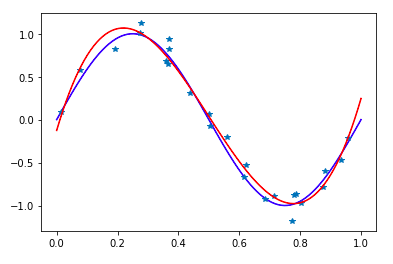

In [5]:
# Example image required for the Problem 1
from IPython.display import Image
Image(filename='images/Fig2.png')

Coefficients: [  0.          12.00090089 -35.07074983  23.44153538]


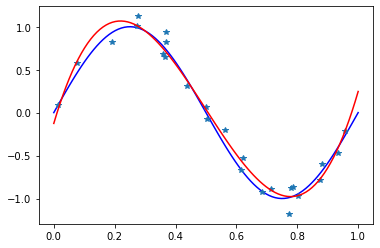

In [6]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

## == Create linear regression object == ##
lreg = linear_model.LinearRegression()
n_order = 3

# YOUR CODE HERE
# Problem 1.1.
# Generate "PolynomialFeatures()" of "n_order" and fit the model to data (Hint: fit_transform())
poly = PolynomialFeatures(n_order)
X = poly.fit_transform(x.reshape(-1, 1), y)
Xt = poly.transform(xt.reshape(-1, 1))

# Problem 1.2.
# Fit linear regression object with "X" and "y"
lreg.fit(X, y)

# Problem 1.3.
# Print fitted linear regression model's coefficients
coefficients = lreg.coef_
print('Coefficients:', coefficients)

# Problem 1.4. 
# Predict the points using fitted linear regression model for "Xt"
ypred = lreg.predict(Xt)


# Problem 1.5.
# Plot data points and obtained linear regression curve
plt.plot(xt, func(xt), 'b')

# Plot data point with symbol '*'
# Your code here
plt.plot(x, y, '*')

# Plot obtained linear regression curve with 'r'
# Your code here
plt.plot(Xt[:,1], ypred, color='r')

In [7]:
# Your points for the Problem 1 coefficients implementation will be given in this cell. Do not modify it.

In [8]:
# Your points for the Problem 1 prediction will be given in this cell. Do not modify it.

## Bayesian linear regression

<a id='Task1.2'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 2

<p> Complete the code below to build and fit a bayesian ridge regression model for curve fitting on sinusoidal data with noise.</p>
    
<p>1) Fit bayesian linear regression object with "X" and "y" and print coefficients</p>
<p>2) Predict the points using fitted bayesian linear regression model for "Xt" and also return the standard deviation</p>
<p>3) Plot data point and obtained bayesian linear regression curve. Also add the 95% prediction confidence interval with $\pm 1.96 \times ystd$</p>

**Hint: Your output image should look like in the cell below**
    
<p>4) Repeat step 1 to 3 with new fitted bayesian linear regression model</p>
    
Note: Plot in red shaded are the 95% confidence interval corresponding to $\pm 1.96$ standard deviations above mean.


</div>

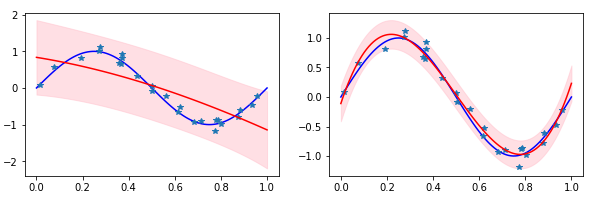

In [9]:
# Example image required for the Problem 2 
from IPython.display import Image
Image(filename='images/Fig3.png')

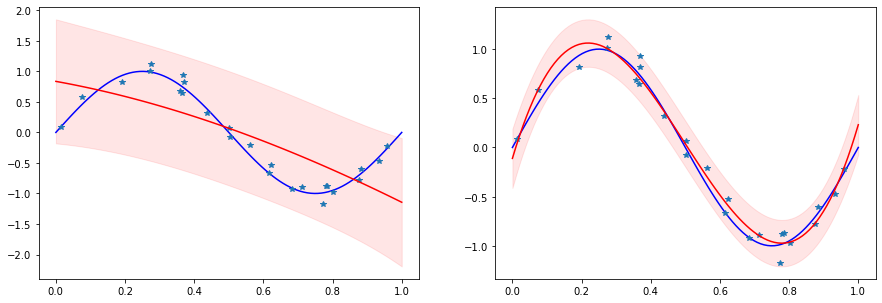

In [10]:
## == Create bayesian linear regression object == ##
breg = linear_model.BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

# YOUR CODE HERE

# Problem 2.1.
# Fit bayesian linear regression object with "X" and "y" and print coefficients
breg.fit(X, y)
coefficient1 = breg.coef_
f = plt.figure(figsize=(15,5))

# Problem 2.2.
# Predict the points using fitted bayesian linear regression model for "Xt" and also return the standard deviation
ypred1, ystd1 = breg.predict(Xt, return_std=True)

# Problem 2.3.
# Plot data point, obtained bayesian linear regression curve and 95% CI
# First subplot
f.add_subplot(1,2,1)
plt.plot(xt, func(xt), 'b')

# Plot data point with symbol '*'
# Your code here
plt.plot(x, y, '*')

# Plot obtained bayesian linear regression curve with 'r', also plot the 95% CI for predictions
# Your code here
plt.plot(Xt[:,1], ypred1, color='r')
plt.fill_between(Xt[:,1], ypred1 - 1.96 * ystd1, ypred1 + 1.96 * ystd1, alpha=0.1, color='r')

# Set new parameters for the bayesian linear regression object
breg.set_params(alpha_init=1., lambda_init= 1e-3) 

# Updating the initial value for alpha (precision of the noise) and 
# initial value for lambda (precision of the weights)

# Problem 2.4.
# Perform the steps from 1 to 3 again with new fitted bayesian linear regression model
breg.fit(X, y)
coefficient2 = breg.coef_

ypred2, ystd2 = breg.predict(Xt, return_std=True)

# Remember to plot the results for second model as well
f.add_subplot(1,2,2)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y, '*')
plt.plot(Xt[:,1], ypred2, color='r')
plt.fill_between(Xt[:,1], ypred2 - 1.96 * ystd2, ypred2 + 1.96 * ystd2, alpha=0.1, color='r')

In [11]:
# Your points for the Problem 2 predictions will be given in this cell. Do not modify it.

In [12]:
# Your points for the Problem 2 standard deviation calculations will be given in this cell. Do not modify it.

In [13]:
# Your points for the Problem 2 coefficient calculations will be given in this cell. Do not modify it.

# Robust parameter estimation: curve fitting

## Linear regression and Bayesian linear regression

<a id='Task2.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 3

<p> Complete the code below to build and fit linear and bayesian linear regression models for curve fitting on sinusoidal data with noise and bias</p>

<p>1) Repeat all the steps from problem 1 and 2 but this time using 'y2' (data with outliers defined in tutorial)</p>
<p>2) Compare all the results from Problem 1, 2, and 3. Explain your reasoning why models behave differently?</p>


**Hint: Your output image should look like in the cell below**


</div>

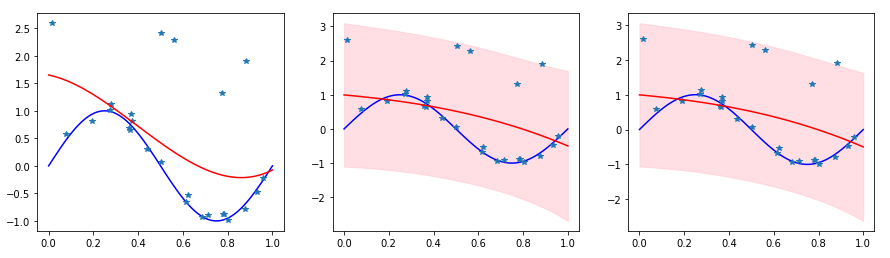

In [14]:
# Example image required for the Problem 3
from IPython.display import Image
Image(filename='images/Fig4.png')

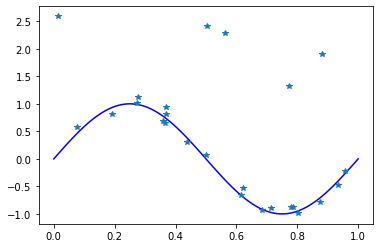

In [15]:
# This is the same data from the tutorial. Use these values. Use the same X as in problem 1. 

size = 25
bias = 2.5
rng = np.random.RandomState(1234)
x = rng.uniform(0., 1., size)
y = func(x) + rng.normal(scale=0.1, size=size)
# Add outlier bias
y[15:20] = y[15:20] + bias
xt = np.linspace(0., 1., 100)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y, '*')

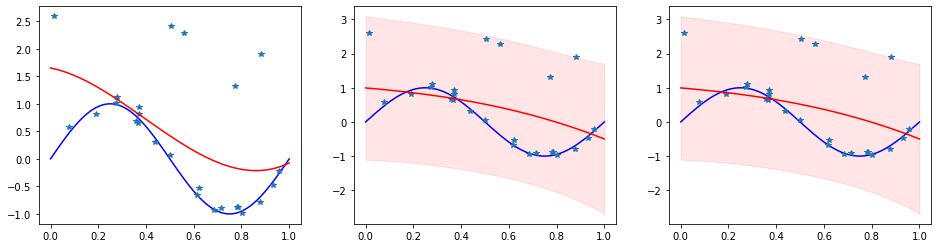

In [16]:
# Problem 3.1: Repeat all the steps from problem 1 and 2 but this time using 'y2' (data with outliers defined in tutorial)

# YOUR CODE HERE

lreg = lreg.fit(X, y2)
coefficient1 = lreg.coef_

ypred1 = lreg.predict(Xt) # Do prediction with lreg model for "Xt"

breg = breg.fit(X, y2)
coefficient2 = breg.coef_

ypred2, ystd2 = breg.predict(Xt, return_std=True) # Do prediction with breg model for "Xt"

breg.set_params(alpha_init=1., lambda_init= 1e-3) 
breg.fit(X, y2)
coefficient3 = breg.coef_

ypred3, ystd3 = breg.predict(Xt, return_std=True) # Do prediction with the modified breg model for "Xt"

# Remember to plot all the results also
f = plt.figure(figsize=(16,4))

f.add_subplot(1,3,1)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y2, '*')
plt.plot(Xt[:,1], ypred1, color='r')

f.add_subplot(1,3,2)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y2, '*')
plt.plot(Xt[:,1], ypred2, color='r')
plt.fill_between(Xt[:,1], ypred2 - 1.96 * ystd2, ypred2 + 1.96 * ystd2, alpha=0.1, color='r')

f.add_subplot(1,3,3)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y2, '*')
plt.plot(Xt[:,1], ypred3, color='r')
plt.fill_between(Xt[:,1], ypred3 - 1.96 * ystd3, ypred3 + 1.96 * ystd3, alpha=0.1, color='r')

In [17]:
# Your points for the Problem 3 predictions will be given in this cell. Do not modify it.

In [18]:
# Your points for the Problem 3 coefficient calculations will be given in this cell. Do not modify it.

####  3.2 Compare all the results from Problem 1, 2, and 3. Explain your reasoning why models behave differently?

Answer to 3.2 in the cell below


Both Linear regression and Bayesian linear regression models perform well on data without outliers fitting similar curves.
However, the bayesian model requires some fine tuning for its regularization parameters alpha and lambda representing precision of noise and weights respectively.

Both models fail at providing accurate results if the data includes outliers. Linear regression seems to be more affected because it does not take into account any priori distribution information i.e. does not fit the curve in a probablistic manner.

## RANSAC

<a id='Task2.2'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4

<p> Complete the code below to build and fit a RANSAC model for curve fitting on sinusoidal data with noise and bias</p>
<p>1) Fit RANSAC model with "X" and "y2"</p>
<p>2) Predict the points using fitted RANSAC model for "Xt"</p>
<p>3) Plot data points and obtained curve</p>

**Hint: Your output image should look like in the cell below**

<p>4) Compare this results with Problem 3. Explain your reasoning why models behave differently?</p>

</div>

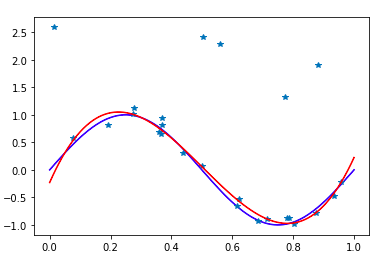

In [19]:
# Example image required for the Problem 4
from IPython.display import Image
Image(filename='images/Fig5.png')

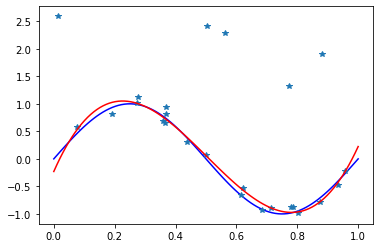

In [20]:
# Problem 4.1.

# YOUR CODE HERE

## == Create linear regression object using RANSACRegressor== #
np.random.seed(0) # Do not change
ransac = linear_model.RANSACRegressor().fit(X, y2)

# Problem 4.2.: Predict the points using fitted RANSAC model for "Xt"
ypred = ransac.predict(Xt)

# Remember to plot the results
plt.plot(xt, func(xt), 'b')
plt.plot(x, y2, '*')
plt.plot(Xt[:,1], ypred, color='r')

In [21]:
# Your points for the Problem 4 will be given in this cell. Do not modify it.

#### 4.4 Compare this results with Problem 3. Explain your reasoning why models behave differently?

Answer to 4.4 in the cell below

RANSAC model manages to fit the data correctly despite having outliers, with a result as good as linear and bayesian models on data without outliers.

The reason is that RANSAC is an iteretive algorithms that samples a subset of the data and fits a new curve in each iteration, then picks the best one with the highest confidence minimizing the effect of outliers.

## Gaussian Mixture Model

<a id='Task2.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 5

<p>Consider the data from file gmm_data.csv. 

1) Prepare scatter plot of the data where you plot the second column against the first column.

**Hint: Your output image should look like in the cell below**

2) Perform K-means clustering with 4 clusters on data points: fit model to data and predict the cluster labels of data points. Prepare a scatter plot of data points with different colors indicating different cluster labels. 

**Hint: Your output image should look like in the cell below**

3) Apply Gaussian Mixture Model with parameter covariance_type = 'full', random_state = 0 and with with 4 clusters; again fit model with data and predict cluster labels. Plot data points with different colors corresponding to cluster labels. Use GMM to predict also cluster labels' posterior probabilities. 

**Hint: Your output image should look like in the cell below**

4) Compare K means and GMM; what is their principal difference? How their outputs differ here and what might be the reason for it? </p>

</div>

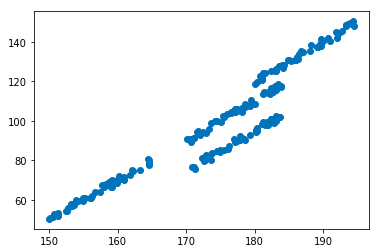

In [22]:
# Example image required for the Problem 5.1
from IPython.display import Image
Image(filename='images/Fig6.png')

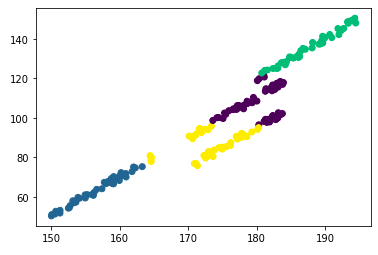

In [23]:
# Example image required for the Problem 5.2
from IPython.display import Image
Image(filename='images/Fig7.png')

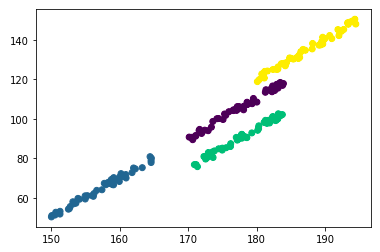

In [24]:
# Example image required for the Problem 5.3
from IPython.display import Image
Image(filename='images/Fig8.png')

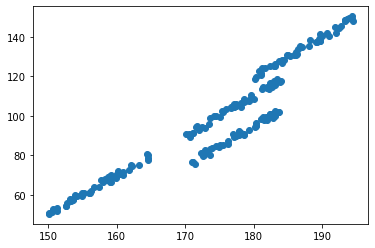

In [25]:
# Problem 5.1.: Load and plot the data in this cell

# YOUR CODE HERE
data = np.loadtxt("data/gmm_data.csv", delimiter= ',', dtype=float)
plt.scatter(data[:,0], data[:,1])

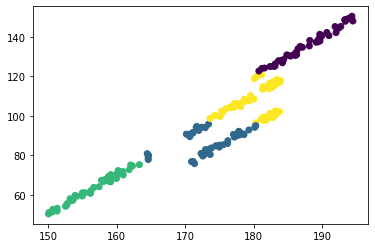

In [26]:
# Problem 5.2: K-means clustering
#DO NOT CHANGE THE SEED
#K-means clustering with 4 clusters

# YOUR CODE HERE
from sklearn.cluster import KMeans

np.random.seed(0)
labels1 = KMeans(n_clusters=4).fit_predict(data)

plt.scatter(data[:,0], data[:,1], c=labels1)

In [27]:
# Your points for the Problem 5 K-means labels will be given in this cell. Do not modify it.

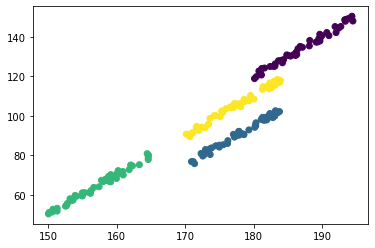

In [28]:
# Problem 5.3.: Gaussian Mixture Model

# YOUR CODE HERE
from sklearn.mixture import GaussianMixture

#GMM clustering with 4 clusters, random_state=0 and covariance_type="full"
gmm = GaussianMixture(n_components=4, random_state=0, covariance_type="full")
labels2 = gmm.fit_predict(data)
probs = gmm.predict_proba(data)

plt.scatter(data[:,0], data[:,1], c=labels2)

In [29]:
# Your points for the Problem 5 Gaussian Mixture labels will be given in this cell. Do not modify it.

In [30]:
# Your points for the Problem 5 Gaussian Mixture probabilities will be given in this cell. Do not modify it.

#### 5.4 Compare K means and GMM; what is their principal difference? How their outputs differ here and what might be the reason for it?

The main difference between K means and GMM is that the latter is a probabilistic model. 

K means results seems to find cluster centroids that are evenly spaced from each other resulting in clusters of equal variance, this only works well for convex and isotropic data, our data is not.

On the other hand, GMM assumes all the data points are generated from a mixture of a finite number of Gaussian distributions and it tried to find the parameters of those distributions resulting in clusters that better fit the isotropic shape of our data.